In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
from datetime import datetime as dt

In [ ]:
#Leitura da base de dados
dados = pd.read_csv('Data - data (2).csv')
#

In [ ]:
#Analise da distribuição e dos tipos dos dados
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
dados.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
112976,545906,22960,JAM MAKING SET WITH JARS,6,3/8/2011 09:23,4.25,15764.0,United Kingdom
112977,545906,22966,GINGERBREAD MAN COOKIE CUTTER,12,3/8/2011 09:23,1.25,15764.0,United Kingdom
112978,545906,22993,SET OF 4 PANTRY JELLY MOULDS,12,3/8/2011 09:23,1.25,15764.0,United Kingdom
112979,545906,22961,JAM MAKING SET PRINTED,12,3/8/2011 09:23,1.45,15764.0,United Kingdom
112980,545906,22980,PANTRY SCRUBBING BRUSH,12,3,NaN,NaN,NaN


In [ ]:
dados.describe()

,Quantity,UnitPrice,CustomerID
count,112981.000000,112980.000000,75045.000000
mean,8.856303,5.258388,15336.244840
std,316.785033,113.840492,1755.597555
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13880.000000
50%,3.000000,2.460000,15311.000000
75%,8.000000,4.250000,16945.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
dados.info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112981 entries, 0 to 112980
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    112981 non-null  object 
 1   StockCode    112981 non-null  object 
 2   Description  112656 non-null  object 
 3   Quantity     112981 non-null  int64  
 4   InvoiceDate  112981 non-null  object 
 5   UnitPrice    112980 non-null  float64
 6   CustomerID   75045 non-null   float64
 7   Country      112980 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.9+ MB


In [ ]:
#Valores faltantes e tratamento destes nulos
dados.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,325
Quantity,0
InvoiceDate,0
UnitPrice,1
CustomerID,37936
Country,1


In [ ]:
dados_perdidos = dados.isna().sum() / len(dados) * 100

print(dados_perdidos)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.287659
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000885
CustomerID     33.577327
Country         0.000885
dtype: float64


<Axes: >

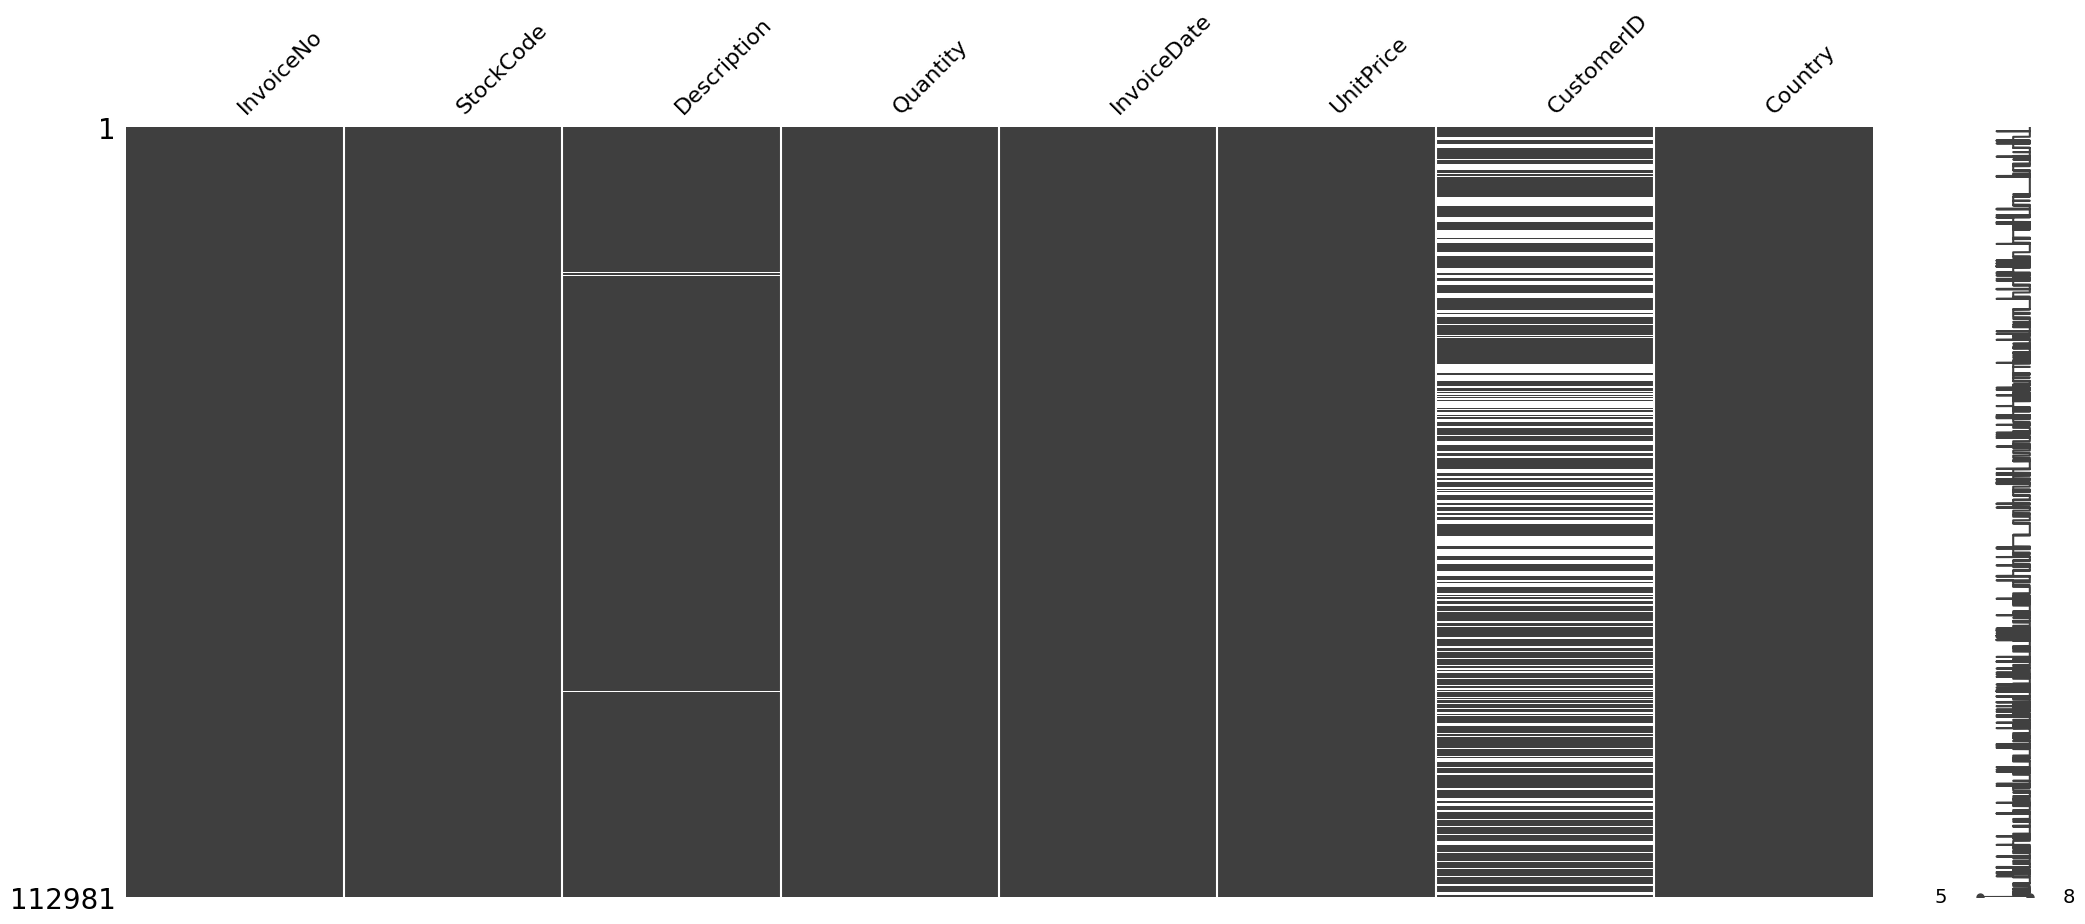

In [ ]:
msno.matrix(dados)

In [ ]:
dados = dados.dropna()

<Axes: >

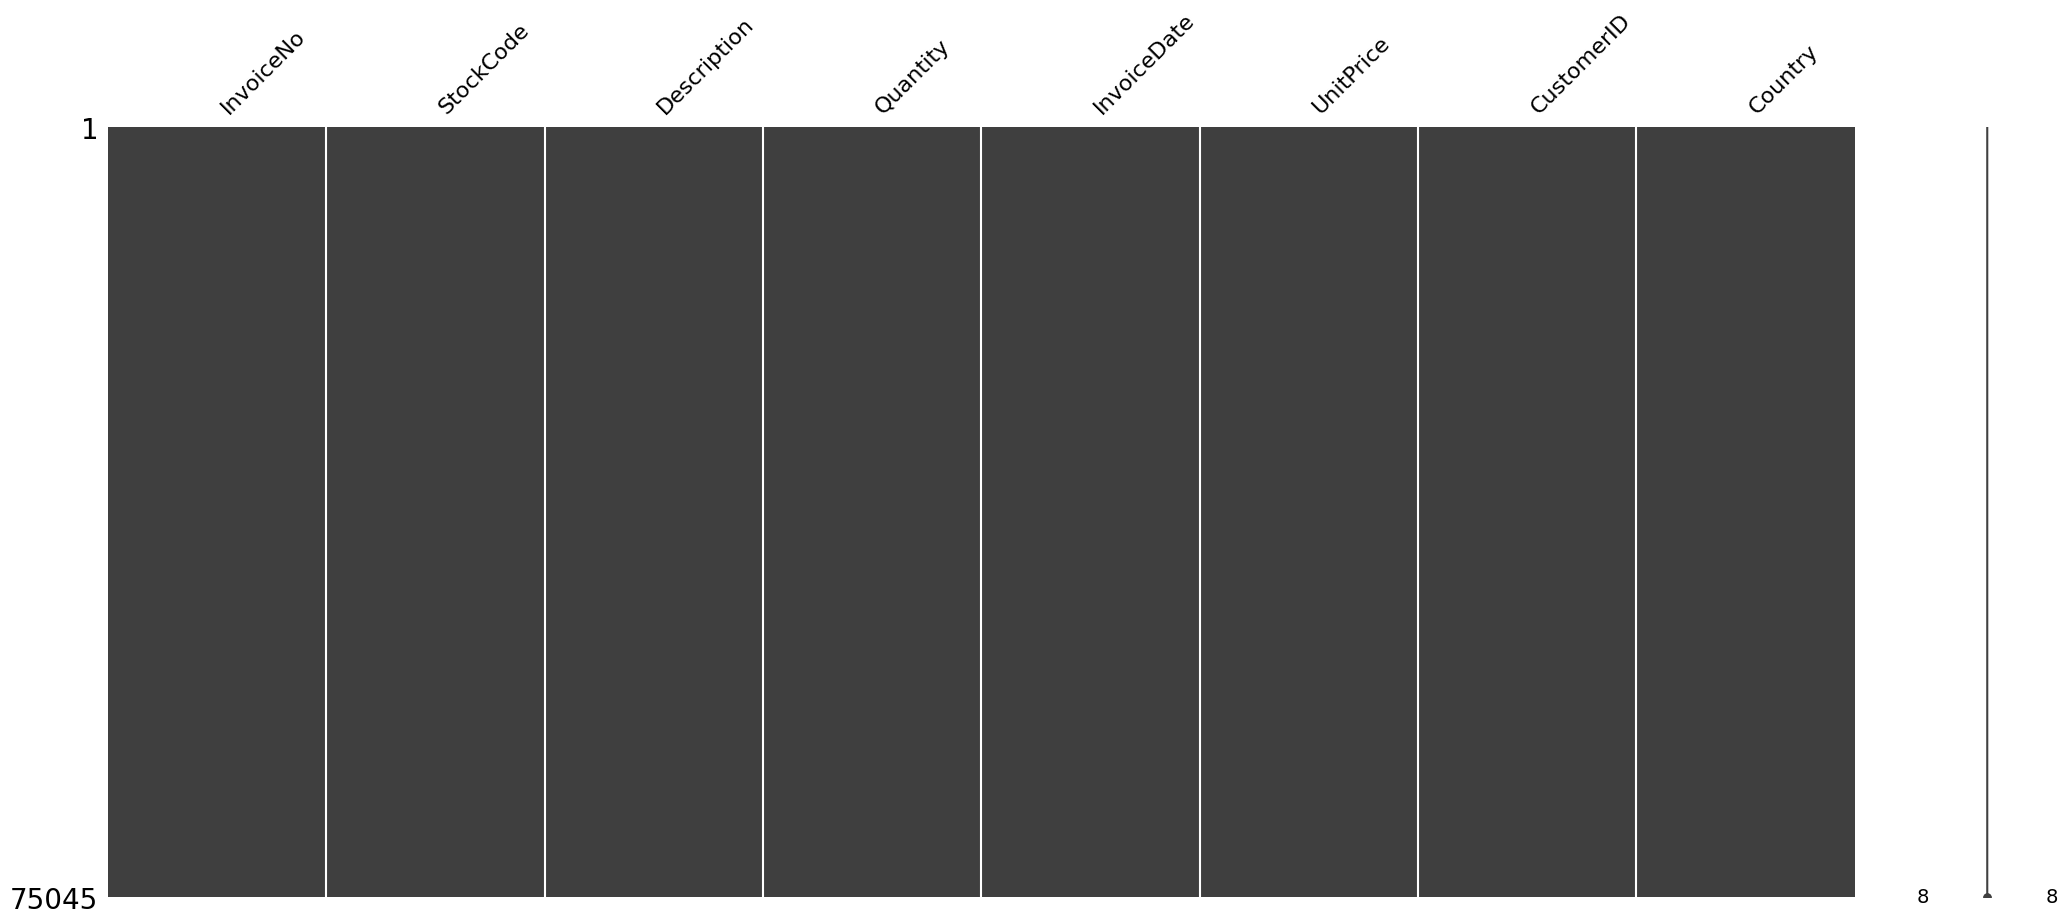

In [ ]:
msno.matrix(dados)

In [ ]:
dados.isna().sum()
#

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
dados = dados.loc[dados['UnitPrice'] > 0]
dados = dados.loc[dados['Quantity'] > 0]

In [ ]:
#Verificação e tratamento de linhas duplicadas
dados_duplicados = dados.duplicated().value_counts()

print(dados_duplicados)

False    72071
True       993
Name: count, dtype: int64


In [ ]:
dados = dados.drop_duplicates(keep=False)

In [ ]:
dados.duplicated().value_counts()
#

,count
False,71153


In [ ]:
#Correção do tipo de dados
dados.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
dados['CustomerID'] = dados['CustomerID'].astype(int)

<ipython-input-58-4ae43327eaf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['CustomerID'] = dados['CustomerID'].astype(int)


In [ ]:
dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])

<ipython-input-59-bdbb140a46de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['InvoiceDate'] = pd.to_datetime(dados['InvoiceDate'])


In [ ]:
dados.dtypes
#

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


<Axes: >

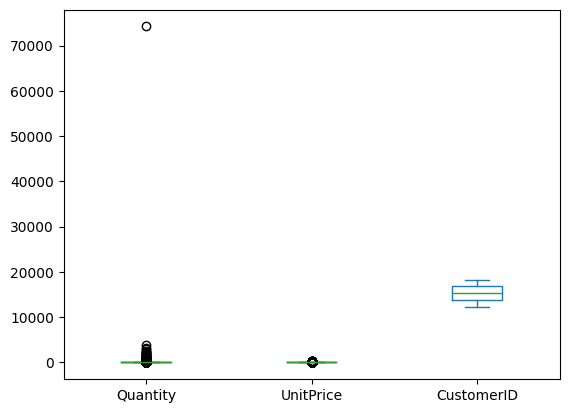

In [ ]:
#Tratamento de outliers
dados.plot.box()

In [ ]:
dados = dados.loc[dados['Quantity'] < 10000]
dados = dados.loc[dados['UnitPrice'] < 5000]

<Axes: >

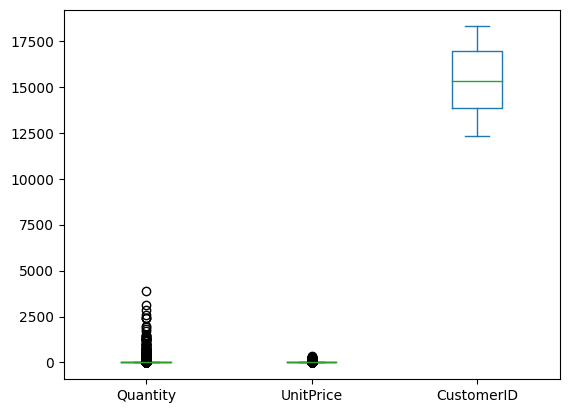

In [ ]:
dados.plot.box()
#

In [ ]:
dados['TotalPrice'] = dados['Quantity'] * dados['UnitPrice']

In [ ]:
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
Ultcompra = (dados['InvoiceDate'].max())
print(Ultcompra)

2011-03-08 09:23:00


In [ ]:
dados.groupby(['Country'])['TotalPrice'].sum().nlargest(10).copy()

,TotalPrice
Country,
United Kingdom,1299486.80
Netherlands,58407.55
EIRE,44541.23
Germany,43907.57
Australia,41337.82
France,37909.06
Spain,14516.12
Japan,13534.78
Switzerland,8191.07


In [ ]:
dados.groupby(['Description'])['TotalPrice'].sum().nlargest(10).copy()

,TotalPrice
Description,
REGENCY CAKESTAND 3 TIER,41639.70
WHITE HANGING HEART T-LIGHT HOLDER,30387.25
CHILLI LIGHTS,15695.81
JUMBO BAG RED RETROSPOT,15067.65
VINTAGE UNION JACK MEMOBOARD,14119.53
POSTAGE,13336.00
WOOD BLACK BOARD ANT WHITE FINISH,10855.16
HEART OF WICKER LARGE,10688.62
SET OF 3 CAKE TINS PANTRY DESIGN,9799.50


In [ ]:
dados.set_index('InvoiceDate').resample('MS')['TotalPrice'].sum()

,TotalPrice
InvoiceDate,
2010-12-01,568311.01
2011-01-01,489670.73
2011-02-01,445065.94
2011-03-01,123009.56


In [ ]:
dados['Month'] = dados['InvoiceDate'].dt.month

In [ ]:
result = dados.groupby(['Month','Country'])['TotalPrice'].sum().nlargest(10).copy()
print(result)

Month  Country       
12     United Kingdom    494472.27
1      United Kingdom    362475.75
2      United Kingdom    353614.22
3      United Kingdom     88924.56
1      Netherlands        26611.16
2      Netherlands        23011.91
1      EIRE               21904.19
       France             17740.12
       Germany            16850.84
3      Australia          16726.84
Name: TotalPrice, dtype: float64


In [ ]:
dados.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12


In [ ]:
reference_date = pd.Timestamp(dt.now().date())

In [ ]:
#Cálculo de RFM
rfm = dados.groupby('CustomerID'). agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

In [ ]:
rfm.rename(columns ={'InvoiceNo': 'Frequency', 'TotalPrice': 'Value', 'InvoiceDate': 'Recency'}, inplace=True)

In [ ]:
rfm.head()

,Recency,Frequency,Value
CustomerID,,,
12347,5019,60,1187.18
12348,5020,23,1120.24
12350,5012,17,334.40
12352,4985,23,1281.15
12356,5027,36,2271.62


In [ ]:
Quantidade = rfm.quantile(q=[0.25, 0.5, 0.75])

def RScore(x, p, d):
  if p == 'Recency':
    if x <= d[p][0.25]:
      return 4
    elif x <= d[p][0.50]:
      return 3
    elif x <= d[p][0.75]:
      return 2
    else:
      return 1
  else:
      if x <= d[p][0.25]:
        return 1
      elif x <= d[p][0.50]:
        return 2
      elif x <= d[p][0.75]:
        return 3
      else:
        return 4

In [ ]:
    rfm['R'] = rfm['Recency'].apply(RScore, args=('Recency', Quantidade,))
    rfm['F'] = rfm['Frequency'].apply(RScore, args=('Frequency', Quantidade,))
    rfm['M'] = rfm['Value'].apply(RScore, args=('Value', Quantidade,))

In [ ]:
rfm.head()
#

,Recency,Frequency,Value,R,F,M
CustomerID,,,,,,
12347,5019,60,1187.18,2,4,4
12348,5020,23,1120.24,2,2,4
12350,5012,17,334.40,3,2,2
12352,4985,23,1281.15,4,2,4
12356,5027,36,2271.62,2,3,4
